In [233]:
import glob
import numpy as np
import pandas as pd
import cv2
import random
import matplotlib.pyplot as plt
from zipfile import ZipFile
from google.colab import files
import os

In [141]:
file2 = "/content/spectrograms-20221002T173839Z-001.zip"

In [ ]:
with ZipFile(file2, 'r') as zip:
    zip.printdir()
    zip.extractall()

In [194]:
data1 = "/content/spectrograms/0/100852-0-0-0.png"

In [287]:
img0 = cv2.imread(data1)
len(img0)

374

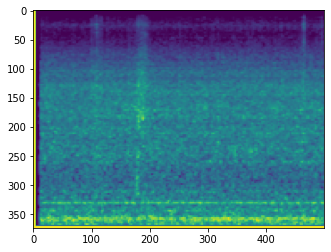

In [94]:
img2 = cv2.cvtColor(img0,cv2.COLOR_BGR2GRAY)
plt.imshow(img2)
plt.show()

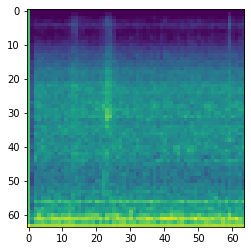

In [101]:
img3 = cv2.resize(img2,(64,64),interpolation= cv2.INTER_AREA)
plt.imshow(img3)
plt.show()

In [ ]:
img4 = img3/255
img4

In [179]:
paths = os.listdir('spectrograms')
paths

['3', '0', '9', '4', '2', '5', '7', '6', '1', '8']

In [207]:
path0 = '/content/spectrograms/'+ str(paths[0])
path0

'/content/spectrograms/3'

In [208]:
path1 = os.listdir(path0)
path1[1]

'165567-3-2-0.png'

In [ ]:
os.listdir(path0)

In [ ]:
os.listdir(path0)[0]

In [251]:
images = []
labels = []

In [252]:
for i in paths:
    path0 = '/content/spectrograms/'+ str(i)
    for path in os.listdir(path0):
        path = '/content/spectrograms/'+ str(i) + "/" + path
        #print(path)
        img = cv2.imread(path)
        img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img,(64,64),interpolation= cv2.INTER_AREA)
        img = img/255.0
        images.append(img)
        label = path.split("-")[1]
        labels.append(int(path.split("-")[1]))

In [253]:
labels10 = np.array(labels)
images10 = np.array(images).astype("float32")

In [262]:
from sklearn.model_selection import train_test_split

x_train = []
x_temp = []
y_train = []
y_temp = []
x_val = []
x_test = []
y_val = []
y_test = []

x_train, x_temp, y_train, y_temp = train_test_split(images10, labels10, test_size = 0.2)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size = 0.5)

In [267]:
len(x_train)

6985

In [268]:
len(x_temp)

1747

In [271]:
len(x_val)

873

In [272]:
len(x_test)

874

In [277]:
np.save('/content/x_train.npy', x_train)
np.save('/content/y_train.npy', y_train)
np.save('/content/x_val.npy', x_val)
np.save('/content/y_val.npy', y_val)
np.save('/content/x_test.npy', x_test)
np.save('/content/y_test.npy', y_test)